# Zonal Statistics


Zonal statistics is a method used in geographic information systems (GIS) to analyze and summarize spatial data within predefined zones or regions.

These zones could be administrative boundaries, such as states or counties, or they could be defined by specific features on a map, like watersheds or land use categories, or defined manually (eg. by a grid). 

Zonal statistics involve calculating various statistical measures, such as mean, median, sum, standard deviation, etc., for the values of a raster or vector dataset within each zone. 

This analysis helps in understanding spatial patterns, identifying trends, and making informed decisions in fields such as environmental management, urban planning, agriculture, and more.

![](../images/zs.png)

(Source: Saldanha R, Akbarinia R, Pedroso M, et al. Zonal statistics datasets of climate indicators for Brazilian municipalities. Environmental Data Science. 2024;3:e2. doi:10.1017/eds.2024.3)

Imports for the demo : 

In [16]:
# Import specific modules and functions from rasterio for masking, plotting, and memory file handling
import rasterio
from rasterio import mask, transform
from rasterio.plot import show
from rasterio.io import MemoryFile

# Import rastestats library to do zonal stats
from rasterstats import zonal_stats

# Import the requests library for making HTTP requests
import requests

# Import the osmnx library for working with OpenStreetMap data
import osmnx as ox

# Import the numpy library for numerical computing
import numpy as np

# Import the pyplot module from matplotlib for plotting
import matplotlib.pyplot as plt


In [ ]:
raster_filepath = "../data/sen_ppp_2000.tiff"

To do the demo we will need a Raster, We will be working with the population raster  of senegal from the 2000. 

For info : 

This rasters show population estimations. This means that the data was most likely obtained from various sources, such as governmental agencies, research institutions, or commercial providers. 
These population rasters are typically derived from census data, satellite imagery, and other demographic information.

One common method for creating population rasters involves using census data to estimate the population counts within predefined geographic areas, such as census tracts or administrative boundaries. This data is then spatially interpolated or disaggregated to generate a continuous surface of population density across the study area... 




## Open Raster 

Let's visualize our raster: 

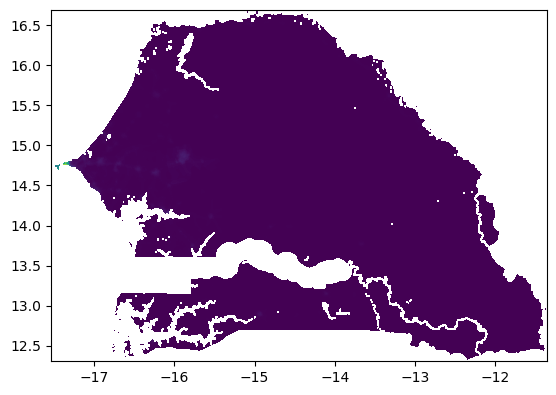

In [21]:
with rasterio.open(raster_filepath) as dataset:
    show(dataset)

## Area Of Interest 


In order to select our area of interest, we will use the openStreetMaps library (osmnx, ox). 

Now, instead of selecting Saint Loius, Senegal, we will be focusing on the "Département de Saint-Louis". 

To do so, we need to know the necessary tags. In our case we have the tags witht he key: *admin_level* and the value = 8. 

*How can you get this information?*
Demo OSM

In [18]:
region_gdf = ox.features_from_place("Département de Saint-Louis", tags={"admin_level": "8"})
region_gdf.explore()

## zonal_stats function

We will open the raster as we did in the past demo. 
So we need the mask function from rasterio in order to select the area of interest. Make sure to transfort the crs to the crs of the source dataset (*src* in our code). 

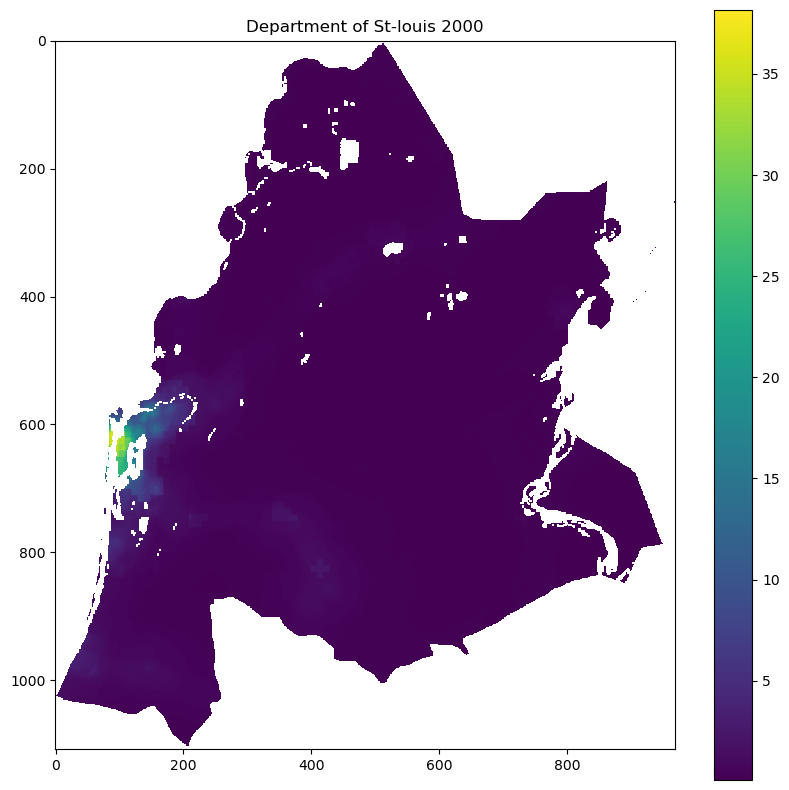

In [27]:
with rasterio.open(raster_filepath) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    # region_gdf.to_crs(src.crs) - ensures that the geometries and the raster dataset have the same spatial reference system
    img, tr = mask.mask(src, region_gdf.to_crs(src.crs)["geometry"], crop=True, nodata=np.nan)
    #show(img, ax=ax, cmap='viridis', transform=tr)
    plt.imshow(img[0])
    plt.colorbar()
    plt.title('Department of St-louis 2000')
    plt.show()

As we saw in the last demo, we can get the sum of the population "manually" but we should make sure that we "clean" the data and eliminate the nodata data. 

In [28]:
img[img != -99999].sum() # gente que vive en la region 

nan

## RasterStats

But, you can also get the same result with *zonal_stats()* function from [rasterstats](https://pythonhosted.org/rasterstats/manual.html#zonal-statistics).


By default, the zonal_stats function will return the following statistics

- min
- max
- mean
- count

Optionally, these statistics are also available.

- sum
- std
- median
- majority
- minority
- unique
- range
- nodata
- percentile 

(EXPL. ANETA min,max,cout)

- Minimum (min):

    The minimum refers to the smallest value of a specific attribut within the "pixels" of the raster.

- Maximum (max):

    The maximum represents the largest value of a particular attribute within the "pixels" of the raster 

- Count:

    Count refers to the number of pixels. 


### Default: If we do not specify what we want, we will get min, max, mean and count.

In [29]:
# If we do not specify what we want, we will get min, max, mean and count. 

stats = zonal_stats(region_gdf, raster_filepath) 
stats

[{'min': 0.27190476655960083,
  'max': 0.6120380163192749,
  'mean': 0.37669002451795214,
  'count': 235},
 {'min': 0.10305126756429672,
  'max': 0.8648279905319214,
  'mean': 0.29802557832451276,
  'count': 465},
 {'min': 8.071292877197266,
  'max': 23.897705078125,
  'mean': 15.030851038490853,
  'count': 41},
 {'min': 21.811195373535156,
  'max': 22.6021671295166,
  'mean': 22.145640055338543,
  'count': 3},
 {'min': 22.19955825805664,
  'max': 23.19333267211914,
  'mean': 22.59619140625,
  'count': 3},
 {'min': 0.2897140681743622,
  'max': 22.19955825805664,
  'mean': 2.904673580670249,
  'count': 221},
 {'min': 22.148937225341797,
  'max': 23.19333267211914,
  'mean': 22.551478068033855,
  'count': 3},
 {'min': 22.148937225341797,
  'max': 22.148937225341797,
  'mean': 22.148937225341797,
  'count': 1},
 {'min': 22.148937225341797,
  'max': 22.148937225341797,
  'mean': 22.148937225341797,
  'count': 1},
 {'min': 21.811195373535156,
  'max': 22.148937225341797,
  'mean': 21.980066

### Optional Statistics: 

We will now get the sum of the population with zonal stats. 
In order to get it, we should add `stats=[list of desired stats]`

In [30]:
stats = zonal_stats(region_gdf, raster_filepath, stats=["mean","min", "max", "sum", "count"])
stats

[{'min': 0.27190476655960083,
  'max': 0.6120380163192749,
  'mean': 0.37669002451795214,
  'count': 235,
  'sum': 88.52215576171875},
 {'min': 0.10305126756429672,
  'max': 0.8648279905319214,
  'mean': 0.29802557832451276,
  'count': 465,
  'sum': 138.58189392089844},
 {'min': 8.071292877197266,
  'max': 23.897705078125,
  'mean': 15.030851038490853,
  'count': 41,
  'sum': 616.264892578125},
 {'min': 21.811195373535156,
  'max': 22.6021671295166,
  'mean': 22.145640055338543,
  'count': 3,
  'sum': 66.43692016601562},
 {'min': 22.19955825805664,
  'max': 23.19333267211914,
  'mean': 22.59619140625,
  'count': 3,
  'sum': 67.78857421875},
 {'min': 0.2897140681743622,
  'max': 22.19955825805664,
  'mean': 2.904673580670249,
  'count': 221,
  'sum': 641.932861328125},
 {'min': 22.148937225341797,
  'max': 23.19333267211914,
  'mean': 22.551478068033855,
  'count': 3,
  'sum': 67.65443420410156},
 {'min': 22.148937225341797,
  'max': 22.148937225341797,
  'mean': 22.148937225341797,
  '

We got a dictionary as an output. 

How can we get only the values of "sum" ? 

1.  One way to do it is by using the expression [stat["sum"] for stat in stats]

    - The given dictionary contains statistical information for different zones or regions. Each element in the list stats represents the statistics for a particular zone. The keys in each dictionary represent different statistical measures that we provided before ("min", "max", "mean", "count", and "sum").

    - Now, let's break down the expression [stat["sum"] for stat in stats]:

    - [stat["sum"]: This part extracts the value associated with the key "sum" from each dictionary (stat) in the list stats.

    - for stat in stats]: This part iterates over each dictionary (stat) in the list stats.

    - Putting it together, [stat["sum"] for stat in stats] generates a list containing the "sum" values for each zone or region in the stats dictionary.

    - So, the expression [stat["sum"] for stat in stats] would generate a list containing the sum values for each zone:


In [44]:
[stat["sum"] for stat in stats] 

[118.1855697631836,
 167.4595489501953,
 540.7216796875,
 62.78558349609375,
 65.87679290771484,
 761.60595703125,
 64.8625717163086,
 21.336524963378906,
 21.336524963378906,
 42.33189010620117,
 21.336524963378906,
 53925.609375,
 23882.61328125,
 52484.640625,
 32389.90234375,
 45507.7734375,
 98945.1171875,
 1353.341796875,
 353.6141357421875,
 1022.3507690429688,
 28142.99609375,
 34186.64453125,
 35512.46484375]

2. The second way to do this is by using the expression pd.DataFrame(stats)["sum"]:
    - Note that here we are using the pandas libraries *pd* 

    - pd.DataFrame(stats): This part creates a DataFrame object using the pd.DataFrame(). It converts the stats list of dictionaries into a DataFrame, where each dictionary represents a row in the DataFrame and the keys become column names.

    - ["sum"]: This part selects the column named "sum" from the DataFrame.
    - Putting it together, pd.DataFrame(stats)["sum"] creates a pandas Series containing the values from the "sum" column of the DataFrame constructed from the stats list of dictionaries.

    - So, the expression pd.DataFrame(stats)["sum"] would result in a pandas Series containing the "sum" values for each zone:

In [46]:
pd.DataFrame(stats)["sum"]

0       118.185570
1       167.459549
2       540.721680
3        62.785583
4        65.876793
5       761.605957
6        64.862572
7        21.336525
8        21.336525
9        42.331890
10       21.336525
11    53925.609375
12    23882.613281
13    52484.640625
14    32389.902344
15    45507.773438
16    98945.117188
17     1353.341797
18      353.614136
19     1022.350769
20    28142.996094
21    34186.644531
22    35512.464844
Name: sum, dtype: float64

### Adding a new row to our GeoDataFrame

To add a new column to save the data of the population of each zone to our existing geoDataFrame we could use either of the two methods explained before: 

1. pd.DataFrame(stats)["sum"]

In [38]:
region_gdf["pop"] = pd.DataFrame(stats, index=region_gdf.index)["sum"]
region_gdf.head(3)

source  \
element_type osmid                    
way          228077890  ARD_STL;CSE   
             228077921  ARD_STL;CSE   
             357664716  ARD_STL;CSE   

                                                                 geometry  \
element_type osmid                                                          
way          228077890  LINESTRING (-16.32187 16.02216, -16.33758 16.0...   
             228077921  LINESTRING (-16.15109 16.27299, -16.15342 16.2...   
             357664716  LINESTRING (-16.47767 16.02945, -16.47788 16.0...   

                       admin_level name name:ar name:en name:he name:ko  \
element_type osmid                                                        
way          228077890           8  NaN     NaN     NaN     NaN     NaN   
             228077921           8  NaN     NaN     NaN     NaN     NaN   
             357664716           8  NaN     NaN     NaN     NaN     NaN   

                       name:ru name:uk  ... intermittent  \
element_type osmid                      ...                
way          228077890     NaN     NaN  ...          NaN   
             228077921     NaN     NaN  ...          NaN   
             357664716     NaN     NaN  ...           no   

                                                                    nodes  \
element_type osmid                                                          
way          228077890  [2367255470, 2367255391, 2367255195, 236725512...   
             228077921  [8930163817, 2367256362, 2367256357, 236725635...   
             357664716  [3628497224, 3628497633, 3628496732, 362849767...   

                              boundary waterway layer tunnel seasonal ways  \
element_type osmid                                                           
way          228077890  administrative      NaN   NaN    NaN      NaN  NaN   
             228077921  administrative      NaN   NaN    NaN      NaN  NaN   
             357664716  administrative    river   NaN    NaN      yes  NaN   

                       type         pop  
element_type osmid                       
way          228077890  NaN   88.522156  
             228077921  NaN  138.581894  
             357664716  NaN  616.264893  

[3 rows x 23 columns]

Important thing to note here is the `index=region_gdf.index`.
Dataframes as we saw earlier come with indexes.
But if the index isn't the same as the geoDataFrame, we would not be able to get the data in the riwght place. 

Eg. 

In [33]:
region_gdf.index

MultiIndex([(     'way', 228077890),
            (     'way', 228077921),
            (     'way', 357664716),
            (     'way', 357759073),
            (     'way', 396524432),
            (     'way', 396526074),
            (     'way', 396526075),
            (     'way', 396556313),
            (     'way', 396556314),
            (     'way', 396556317),
            (     'way', 399417864),
            ('relation',   3046924),
            ('relation',   3046928),
            ('relation',   3046929),
            ('relation',   3046936),
            ('relation',  12989615),
            ('relation',  12989616),
            ('relation',  12989617),
            ('relation',  12989618),
            ('relation',  12989619),
            ('relation',  13067356),
            ('relation',  13067363),
            ('relation',  13067365)],
           names=['element_type', 'osmid'])

In [39]:
region_gdf["pop"] = pd.DataFrame(stats)["sum"]
region_gdf.head(3)

source  \
element_type osmid                    
way          228077890  ARD_STL;CSE   
             228077921  ARD_STL;CSE   
             357664716  ARD_STL;CSE   

                                                                 geometry  \
element_type osmid                                                          
way          228077890  LINESTRING (-16.32187 16.02216, -16.33758 16.0...   
             228077921  LINESTRING (-16.15109 16.27299, -16.15342 16.2...   
             357664716  LINESTRING (-16.47767 16.02945, -16.47788 16.0...   

                       admin_level name name:ar name:en name:he name:ko  \
element_type osmid                                                        
way          228077890           8  NaN     NaN     NaN     NaN     NaN   
             228077921           8  NaN     NaN     NaN     NaN     NaN   
             357664716           8  NaN     NaN     NaN     NaN     NaN   

                       name:ru name:uk  ... intermittent  \
element_type osmid                      ...                
way          228077890     NaN     NaN  ...          NaN   
             228077921     NaN     NaN  ...          NaN   
             357664716     NaN     NaN  ...           no   

                                                                    nodes  \
element_type osmid                                                          
way          228077890  [2367255470, 2367255391, 2367255195, 236725512...   
             228077921  [8930163817, 2367256362, 2367256357, 236725635...   
             357664716  [3628497224, 3628497633, 3628496732, 362849767...   

                              boundary waterway layer tunnel seasonal ways  \
element_type osmid                                                           
way          228077890  administrative      NaN   NaN    NaN      NaN  NaN   
             228077921  administrative      NaN   NaN    NaN      NaN  NaN   
             357664716  administrative    river   NaN    NaN      yes  NaN   

                       type pop  
element_type osmid               
way          228077890  NaN NaN  
             228077921  NaN NaN  
             357664716  NaN NaN  

[3 rows x 23 columns]

In [40]:
region_gdf["pop"] = pd.DataFrame(stats, index=region_gdf.index)["sum"]

2.  The expression [stat["sum"] for stat in stats]

In [13]:
region_gdf["pop_list"] = [stat["sum"] for stat in stats]

And the restult : 

In [31]:
region_gdf.head(3)

source  \
element_type osmid                    
way          228077890  ARD_STL;CSE   
             228077921  ARD_STL;CSE   
             357664716  ARD_STL;CSE   

                                                                 geometry  \
element_type osmid                                                          
way          228077890  LINESTRING (-16.32187 16.02216, -16.33758 16.0...   
             228077921  LINESTRING (-16.15109 16.27299, -16.15342 16.2...   
             357664716  LINESTRING (-16.47767 16.02945, -16.47788 16.0...   

                       admin_level name name:ar name:en name:he name:ko  \
element_type osmid                                                        
way          228077890           8  NaN     NaN     NaN     NaN     NaN   
             228077921           8  NaN     NaN     NaN     NaN     NaN   
             357664716           8  NaN     NaN     NaN     NaN     NaN   

                       name:ru name:uk  ... wikipedia intermittent  \
element_type osmid                      ...                          
way          228077890     NaN     NaN  ...       NaN          NaN   
             228077921     NaN     NaN  ...       NaN          NaN   
             357664716     NaN     NaN  ...       NaN           no   

                                                                    nodes  \
element_type osmid                                                          
way          228077890  [2367255470, 2367255391, 2367255195, 236725512...   
             228077921  [8930163817, 2367256362, 2367256357, 236725635...   
             357664716  [3628497224, 3628497633, 3628496732, 362849767...   

                              boundary waterway layer tunnel seasonal ways  \
element_type osmid                                                           
way          228077890  administrative      NaN   NaN    NaN      NaN  NaN   
             228077921  administrative      NaN   NaN    NaN      NaN  NaN   
             357664716  administrative    river   NaN    NaN      yes  NaN   

                       type  
element_type osmid           
way          228077890  NaN  
             228077921  NaN  
             357664716  NaN  

[3 rows x 22 columns]

Then, as dictionnary can be a little bit hard to handle we could always chande the data type to a DataFrame, which will allow us to do more (easy to check out the values, to make calculations...)

In [49]:
stats

[{'min': 0.32616403698921204,
  'max': 0.7700324654579163,
  'sum': 118.1855697631836},
 {'min': 0.12919899821281433,
  'max': 1.1744413375854492,
  'sum': 167.4595489501953},
 {'min': 8.10580825805664, 'max': 23.55605697631836, 'sum': 540.7216796875},
 {'min': 19.844755172729492,
  'max': 21.945463180541992,
  'sum': 62.78558349609375},
 {'min': 21.841262817382812,
  'max': 22.19426918029785,
  'sum': 65.87679290771484},
 {'min': 0.36141544580459595,
  'max': 21.841262817382812,
  'sum': 761.60595703125},
 {'min': 21.33177947998047, 'max': 22.19426918029785, 'sum': 64.8625717163086},
 {'min': 21.336524963378906,
  'max': 21.336524963378906,
  'sum': 21.336524963378906},
 {'min': 21.336524963378906,
  'max': 21.336524963378906,
  'sum': 21.336524963378906},
 {'min': 20.995365142822266,
  'max': 21.336524963378906,
  'sum': 42.33189010620117},
 {'min': 21.336524963378906,
  'max': 21.336524963378906,
  'sum': 21.336524963378906},
 {'min': 0.12818112969398499, 'max': 17.96164321899414, '

To convert a dictionnary into a dataFrame we can use the pandas function *DataFrame(stats)*

In [43]:
stats_df = pd.DataFrame(stats)
stats_df

,min,max,mean,count,sum
0,0.271905,0.612038,0.376690,235,88.522156
1,0.103051,0.864828,0.298026,465,138.581894
2,8.071293,23.897705,15.030851,41,616.264893
3,21.811195,22.602167,22.145640,3,66.436920
4,22.199558,23.193333,22.596191,3,67.788574
5,0.289714,22.199558,2.904674,221,641.932861
6,22.148937,23.193333,22.551478,3,67.654434
7,22.148937,22.148937,22.148937,1,22.148937
8,22.148937,22.148937,22.148937,1,22.148937
9,21.811195,22.148937,21.980066,2,43.960133


And as we said, when we've got a dataFrame it is easier to do some calculations: 

For instances, if we want to have the total sum of the pupulation (and not just the population by zone), we could:

In [53]:
stats_df["sum"].sum()

409594.90758895874

Or if we want to get for instance the mean of each zone we could: 

In [59]:
stats_df["sum"].div(stats_df["count"])

0      0.502917
1      0.360128
2     13.188334
3     20.928528
4     21.958931
5      3.446181
6     21.620857
7     21.336525
8     21.336525
9     21.165945
10    21.336525
11     0.405865
12     0.682321
13     1.452701
14     0.235724
15     2.880786
16    17.593371
17     4.138660
18     2.296196
19     7.804204
20     0.291722
21     0.583818
22     0.822105
dtype: float64

But we could also add "mean" as a desired value in our zonal_stats() function.

In [62]:
stats_df["mean"]

0      0.502917
1      0.360128
2     13.188334
3     20.928528
4     21.958931
5      3.446181
6     21.620857
7     21.336525
8     21.336525
9     21.165945
10    21.336525
11     0.405865
12     0.682321
13     1.452701
14     0.235724
15     2.880786
16    17.593371
17     4.138660
18     2.296196
19     7.804204
20     0.291722
21     0.583818
22     0.822105
Name: mean, dtype: float64

## Operations with two matrix (rasters)

First we define our area of interest and the raster filepath to the second raster. 

In [46]:
# Defined the area of interest: 
city_aoi = "saint louis senegal"

# Define the second raster 
raster_18_filepath = "../data/sen_ppp_2018.tiff"

The we can open them and we can plot them to see their differences: 

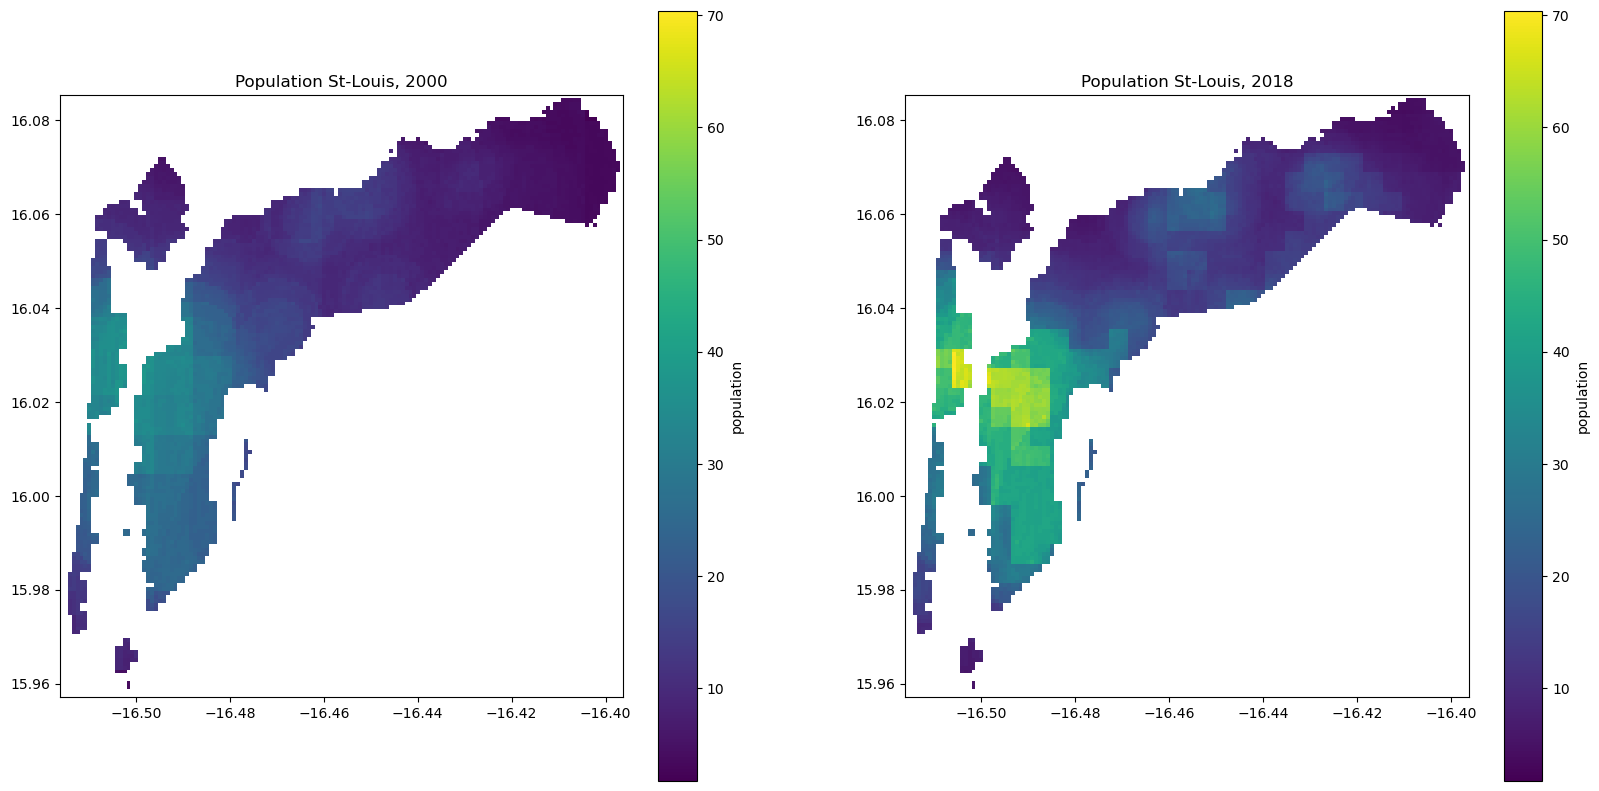

In [66]:
fig, axes = plt.subplots(1,2, figsize=(20,10))

# Load population raster
with rasterio.open(raster_filepath) as pop_src:
    #pop_array = pop_src.read(1)
    pop06_array, tr = mask.mask(pop_src, ox.geocode_to_gdf(city_aoi).to_crs(dataset.crs)["geometry"], crop=True)
    pop06_array[pop06_array == pop_src.nodata] = np.nan
    pop06_array = pop06_array[0]
    
# Load night lights raster
with rasterio.open(raster_18_filepath) as src:
    #lights_array = lights_src.read(1)
    pop18_array, tr = mask.mask(src, ox.geocode_to_gdf(city_aoi).to_crs(dataset.crs)["geometry"], crop=True)
    pop18_array[pop18_array == src.nodata] = np.nan
    pop18_array = pop18_array[0]

# Get min and max values out of both arrays to have a common colorbar
vmin = min(np.nanmin(pop06_array), np.nanmin(pop18_array))
vmax = max(np.nanmax(pop06_array), np.nanmax(pop18_array))

# Plot
show(pop06_array,transform=tr, ax=axes[0], vmin=vmin, vmax=vmax)
fig.colorbar(axes[0].get_images()[0], ax=axes[0], orientation='vertical', label="population")
axes[0].set_title("Population St-Louis, 2000")


show(pop18_array, transform=tr, ax=axes[1], vmin=vmin, vmax=vmax)
fig.colorbar(axes[1].get_images()[0], ax=axes[1], orientation='vertical', label="population")
axes[1].set_title("Population St-Louis, 2018")


plt.show()

We can substract the values from each pixel to get the change of population between the 2000's and the 2018: 

In [71]:
pop_variation = pop18_array - pop06_array

We can now plot the variation of population: 

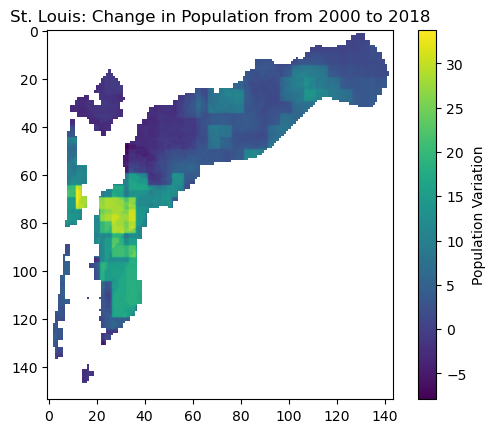

In [73]:
plt.imshow(pop_variation)
plt.title("St. Louis: Change in Population from 2000 to 2018")
plt.colorbar(label="Population Variation")
plt.show()